# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Fourier Transform

## Aliasing

The sampling of a signal by Discrete Fourier Transform for only a finite number of times limits
the accuracy of the deduced high-frequency components present in the signal. If you want high frequency
information, you need high frequency sampling. 

Unfortunately, the inaccurate high frequency components can contaminate the low frequency components of the
signal. This is called aliasing. It is also the cause of the Moire pattern (artifical pattern due to the interference
of high frequency patterns) in digital images
https://en.wikipedia.org/wiki/Moir%C3%A9_pattern

![Textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig12_2.png)

If the signal is the red curve but we only sample the red dots, we will mistakenly think the black curve is the signal. This produces the artificial low frequency mode. 

More precisely, aliasing occurs when a signal containing frequency i is sampled at a rate of s measurements per
unit time with s$\leq$f/2. In this case, the frequencies f and f-2s yield the same DFT. We cannot tell them apart. 
To avoid aliasing we want no frequeices f>s/2 to be in the input signal. This is known as the Nyquist criterion. In practice, filtering the signal is performed beforehand. 

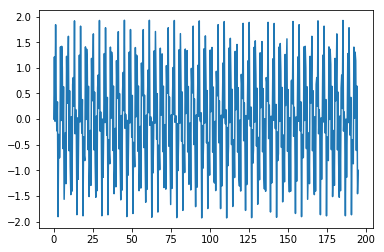

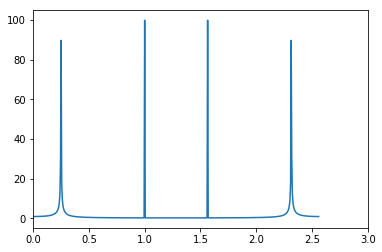

In [20]:

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 0.39

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = sin(pi/2.*x)+sin(2.*pi*x)
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.xlim([0.,3.])
plt.show()



## Filtering Noisy Signals

You measure a signal y(t) that contains noise. Your job is to determine the frequencies that
would be present in the spectrum of the signal if the signal did not contain noise.

Two methods:

1) autocorrelation function

2) filters

### Autocorrelation Function
The true signal is
\begin{equation}
y(t)=s(t)+n(t)
\end{equation}
where s(t) is the true signal, while n(t) is the noise. 
Noise should be a random process and should not be correlated with the signal.
(correlated means that one's peak is also another one's peak or trough). An analytic measure
of the correlation of two arbitrary functions y(t) and x(t) is the correlation function
\begin{equation}
c(\tau)=\int_{-\infty}^{\infty}dt y^{*}(t)x(t+\tau)=\int_{-\infty}^{\infty}dt y^{*}(t-\tau)x(t)
\end{equation}
where $\tau$ is called the lag time and is a variable. If both signals have similar time dependence,
c will be positive at some $\tau$. It can be shown that
\begin{equation}
C(\omega)=\sqrt{2\pi}Y^{*}(\omega)X(\omega)
\end{equation}
where 
\begin{equation}
c(\tau)=\int_{-\infty}^{\infty}d\omega C(\omega)\frac{e^{i\omega \tau}}{\sqrt{2\pi}}
\end{equation}
Basically, the Fourier transform of the correlation function between two signals is proportional to 
the product of the transform of one signal and the complex conjugate of the transform of the other.

If a signal correlates with itself, it is called the autocorrelation function 
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt y^{*}(t)y(t+\tau)=\int_{-\infty}^{\infty}dt y^{*}(t-\tau)y(t)
\end{equation}
This is also called the convolution. It will remove noise.
To see how that works, let's remind ourself: y(t)=s(t)+n(t) and
y(t+$\tau$)=s(t+$\tau$)+n(t+$\tau$). So we have
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt (s(t)s(t+\tau)+s(t)n(t+\tau)+n(t)s(t+\tau)+n(t)n(t+\tau))
\end{equation}
If the noise is truely random and varies much faster than the s(t), the averaged value should be zero.
We then have
\begin{equation}
A(\tau)=\int_{-\infty}^{\infty}dt s(t)s(t+\tau)=A_{s}(\tau)
\end{equation}
Considering
\begin{equation}
A(\tau)=A_{s}(\tau)=\sqrt{2\pi}|S(\omega)|^{2}
\end{equation}

Thus, evaluating the autocorrelation function of the noisy signal gives us the
pure signal's power spectrum. 

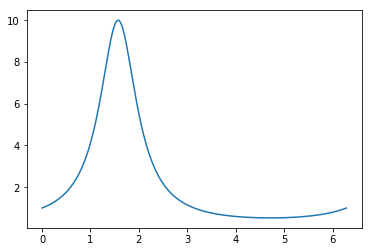

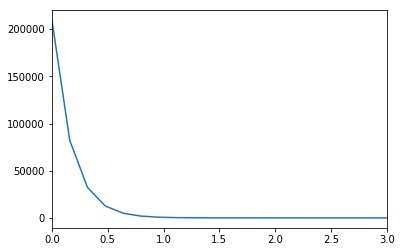

In [45]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.xlim([0.,3.])
plt.show()

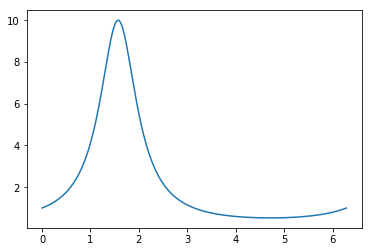

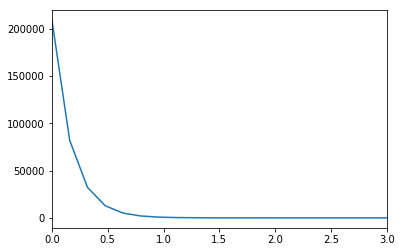

In [50]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))
        xa[i] = x                   
        x += step

     
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += aut[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);    
aut = zeros( (N+1), float ) 
for i in range(0,N+1):
    aut[i]=sum(np.roll(signal,i)*signal)

fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot/sqrt(2.*pi))
plt.xlim([0.,3.])
plt.show()

### Now let's add some noise to the data

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 5000;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))+10.*(2.*random.random()-1)
        xa[i] = x                   
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.show()

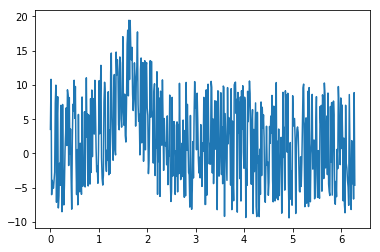

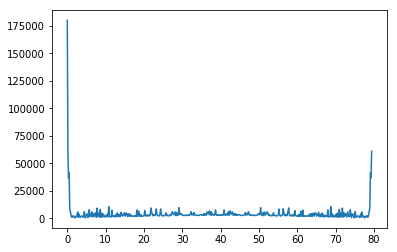

In [64]:
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

step = 2.*pi/N

def f(signal):                                                  # Signal        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 1./(1.-0.9*sin(x))+10.*(2.*random.random()-1)
        xa[i] = x                   
        x += step

     
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += aut[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);    
aut = zeros( (N+1), float ) 
for i in range(0,N+1):
    aut[i]=sum(np.roll(signal,i)*signal)

fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot/sqrt(2.*pi))
plt.show()

### Filtering

We can convert an input signal f(t) to an output signal g(t) using convolution
\begin{equation}
g(t)=\int_{-\infty}^{\infty}d\tau f(\tau)h(t-\tau)\equiv f(t)*h(t)
\end{equation}
h(t) is called the response or transfer function of the filter
\begin{equation}
h(t)=\int_{-\infty}^{\infty}d\tau \delta(\tau)h(t-\tau)
\end{equation}
h(t) is the response of the filter to a unit impulse.
The response must equal zero for $\tau>t$
because events in the future cannot affect the present.

With convolution theorem we have
\begin{equation}
G(\omega)=\sqrt{2\pi}F(\omega)H(\omega)
\end{equation}

High-pass filters (remove low frequency) and Low-pass filters (remove high frequency).

For the low-pass filter, we want to have a cut-off frequency $\omega_{c}$ and filter will
remove all frequency above $\omega_{c}$
\begin{equation}
H(\omega,\omega_{c})=rect(\frac{\omega}{2\omega_{c}}), \quad rect(\omega)=1 \, if\, |\omega|<1/2
\end{equation}
The Fourier transfor of this is 
\begin{equation}
\frac{sin(\omega_{c} t)}{\omega_{c} t}
\end{equation}

This introduces several problems: 1) this filter is noncausal, 2) we need to sample the infinite amount of time.
So normally people use 
\begin{equation}
h[i]=\frac{sin[2\pi\omega_{c}(i-M/2)]}{i-M/2}\left[0.54-0.46 cos\left(
\frac{2\pi i}{M}\right)\right], 0<t<M
\end{equation}

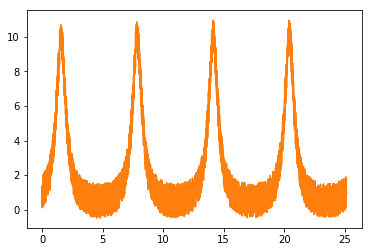

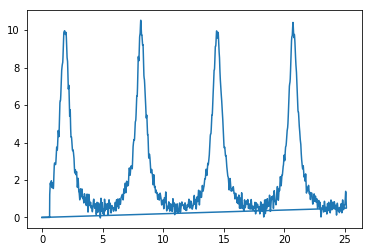

In [52]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# NoiseSincFilter.py
from numpy import *
import matplotlib.pyplot as plt                                         # complex math   
import random

max = 4000
ps = zeros((max),float)
step = 2*math.pi/1000
xa = zeros((max),float) 
f = zeros((max),float) 
array = zeros((max),float)

def function(array,max):
    
    step = 2*pi/1000; x = 0. 
    for i in range(0,max):
        f[i] = 1/(1. - 0.9*sin(x))                             # Function
        array[i] = (1/(1-0.9*sin(x)))+0.5*(2.*random.random()-1)  # Noise
        xa[i] = x
        x += step
		
        
y = zeros((max),float)
h = zeros((max),float)
jar = zeros((max),float)

def filter():                           # Low-pass windowed sinc filter
    
    step = 2*pi/1000
    m = 100                                          # Set filter length
    fc = .07   
    for i in range(0,100):                             # Low-pass filter
        if ((i-(m/2)) == 0):  h[i] = 2*pi*fc 
        if ((i-(m/2))!= 0):   h[i] = sin(2*pi*fc*(i-m/2))/(i-m/2)
        h[i] = h[i]*(0.54 - 0.46*cos(2*pi*i/m))         # Hamming window
    sum = 0.                                 # Normalize low-pass filter
    for i in range(0,100):  sum = sum + h[i]
    for i in range(0,100):  h[i] = h[i] / sum 
    for j in range(100,max-1):               # Convolute input + filter
        y[j] = 0.                    
        for i in range(0,100): y[j] = y[j] + array[j-i] * h[i]
    for j in range(0,max-1):  jar[j]= j*step

function(array, max)                                       
filter()      
        
plt.plot(xa,f)
plt.plot(xa,array)
plt.show()
plt.plot(jar,y)
plt.show()
        
                                               

## The Fast Fourier Transform

We talked about the way to do DFT is 
\begin{equation}
Y_{n}=\frac{1}{\sqrt{2\pi}}\sum_{k=1}^{N} y_{k}Z^{nk}, n=0,1,...,N-1
\end{equation}

n and k both changes from 0 to N-1, so it requires N$^2$ multiplications
and additions of complex numbers. 

In 1965, Cooley and Tukey discovered an algorithm that reduces
the time from $N^2$ to Nlog$_{2}$N. 100 fold speed up for 1000 data points,
FFT is one of the 10 most important algorithms of all time.

https://en.wikipedia.org/wiki/Cooley–Tukey_FFT_algorithm



In [80]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# FFT.py:  FFT for complex numbers in dtr[][2], returned in dtr

from numpy import *
from sys import version 
max = 2100                 
points = 1026                                          # Can be increased
data = zeros((max), float) 
dtr  = zeros((points,2), float)
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (max), complex ) 

def fft(nn,isign):                                      # FFT of dtr[n,2]
    n = 2*nn
    for i in range(0,nn+1):                # Original data in dtr to data
         j = 2*i+1
         data[j] = dtr[i,0]                       # Real dtr, odd data[j]
         data[j+1] = dtr[i,1]                  # Imag dtr, even data[j+1]
    j = 1                           # Place data in bit reverse order
    for i in range(1,n+2, 2):
        if (i-j) < 0 :                # Reorder equivalent to bit reverse
            tempr = data[int(j)]
            tempi = data[int(j+1)]
            data[int(j)] = data[int(i)]
            data[int(j+1)] = data[i+1]
            data[i] = tempr
            data[i+1] = tempi 
        m = n/2;
        while (m-2 > 0): 
            if  (j-m) <= 0 :
                break
            j = j-m
            m = m/2
        j = j+m;
                               
    print(" Bit-reversed data ")
  
    for i in range(1, n+1, 2):
        print("%2d  data[%2d]  %9.5f "%(i,i,data[i]))    # To see reorder
    mmax = 2
    while (mmax-n) < 0 :                                # Begin transform
       istep = 2*mmax
       theta = 6.2831853/(1.0*isign*mmax)
       sinth = math.sin(theta/2.0)
       wstpr = -2.0*sinth**2
       wstpi = math.sin(theta)
       wr = 1.0
       wi = 0.0
       for m in range(1,mmax +1,2):  
           for i in range(m,n+1,istep):
               j = i+mmax
               tempr = wr*data[j]   -wi *data[j+1]
               tempi = wr*data[j+1] +wi *data[j]
               data[j]   = data[i]   -tempr
               data[j+1] = data[i+1] -tempi
               data[i]   = data[i]   +tempr
               data[i+1] = data[i+1] +tempi        
           tempr = wr
           wr = wr*wstpr - wi*wstpi + wr
           wi = wi*wstpr + tempr*wstpi + wi;
       mmax = istep              
    for i in range(0,nn):
        j = 2*i+1
        dtr[i,0] = data[j]
        dtr[i,1] = data[j+1] 
nn = 16                                                      # Power of 2
isign = -1                           # -1 transform, +1 inverse transform
print('        INPUT')
print("  i   Re part   Im  part")
for i in range(0,nn ):                                       # Form array
    dtr[i,0] = 1.0*i                                          # Real part
    dtr[i,1] = 1.0*i                                            # Im part
    print(" %2d %9.5f %9.5f" %(i,dtr[i,0],dtr[i,1]))
fft(nn, isign)                             # Call FFT, use global dtr[][]
print('    Fourier transform')
print("  i      Re      Im    ")
for i in range(0,nn):  
    print(" %2d  %9.5f  %9.5f "%(i,dtr[i,0],dtr[i,1]))
    
sq2pi=1./np.sqrt(2.*pi)
def fourier(dftz):                                              # DFT
    for n in range(0, nn):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, nn):                              
          zexpo = complex(0, twopi*k*n/nn)           # Complex exponent
          zsum += complex(k,k)*exp(-zexpo)           
      dftz[n] = zsum       
      print(n,dftz[n].real,dftz[n].imag)
    
fourier(dftz)
print("Enter and return any character to quit")

        INPUT
  i   Re part   Im  part
  0   0.00000   0.00000
  1   1.00000   1.00000
  2   2.00000   2.00000
  3   3.00000   3.00000
  4   4.00000   4.00000
  5   5.00000   5.00000
  6   6.00000   6.00000
  7   7.00000   7.00000
  8   8.00000   8.00000
  9   9.00000   9.00000
 10  10.00000  10.00000
 11  11.00000  11.00000
 12  12.00000  12.00000
 13  13.00000  13.00000
 14  14.00000  14.00000
 15  15.00000  15.00000
 16  16.00000  16.00000
 17  17.00000  17.00000
 18  18.00000  18.00000
 19  19.00000  19.00000
 20  20.00000  20.00000
 21  21.00000  21.00000
 22  22.00000  22.00000
 23  23.00000  23.00000
 24  24.00000  24.00000
 25  25.00000  25.00000
 26  26.00000  26.00000
 27  27.00000  27.00000
 28  28.00000  28.00000
 29  29.00000  29.00000
 30  30.00000  30.00000
 31  31.00000  31.00000
 32  32.00000  32.00000
 33  33.00000  33.00000
 34  34.00000  34.00000
 35  35.00000  35.00000
 36  36.00000  36.00000
 37  37.00000  37.00000
 38  38.00000  38.00000
 39  39.00000  39.00000
 

 714 714.00000 714.00000
 715 715.00000 715.00000
 716 716.00000 716.00000
 717 717.00000 717.00000
 718 718.00000 718.00000
 719 719.00000 719.00000
 720 720.00000 720.00000
 721 721.00000 721.00000
 722 722.00000 722.00000
 723 723.00000 723.00000
 724 724.00000 724.00000
 725 725.00000 725.00000
 726 726.00000 726.00000
 727 727.00000 727.00000
 728 728.00000 728.00000
 729 729.00000 729.00000
 730 730.00000 730.00000
 731 731.00000 731.00000
 732 732.00000 732.00000
 733 733.00000 733.00000
 734 734.00000 734.00000
 735 735.00000 735.00000
 736 736.00000 736.00000
 737 737.00000 737.00000
 738 738.00000 738.00000
 739 739.00000 739.00000
 740 740.00000 740.00000
 741 741.00000 741.00000
 742 742.00000 742.00000
 743 743.00000 743.00000
 744 744.00000 744.00000
 745 745.00000 745.00000
 746 746.00000 746.00000
 747 747.00000 747.00000
 748 748.00000 748.00000
 749 749.00000 749.00000
 750 750.00000 750.00000
 751 751.00000 751.00000
 752 752.00000 752.00000
 753 753.00000 753.00000


 135  -1676.68537  652.68534 
 136  -1667.05350  643.05349 
 137  -1657.55405  633.55404 
 138  -1648.18413  624.18412 
 139  -1638.94093  614.94092 
 140  -1629.82173  605.82171 
 141  -1620.82388  596.82386 
 142  -1611.94481  587.94479 
 143  -1603.18203  579.18199 
 144  -1594.53305  570.53304 
 145  -1585.99559  561.99557 
 146  -1577.56730  553.56729 
 147  -1569.24597  545.24595 
 148  -1561.02940  537.02939 
 149  -1552.91549  528.91547 
 150  -1544.90216  520.90215 
 151  -1536.98743  512.98741 
 152  -1529.16931  505.16930 
 153  -1521.44593  497.44591 
 154  -1513.81541  489.81539 
 155  -1506.27597  482.27594 
 156  -1498.82582  474.82580 
 157  -1491.46328  467.46325 
 158  -1484.18665  460.18662 
 159  -1476.99433  452.99427 
 160  -1469.88463  445.88462 
 161  -1462.85613  438.85612 
 162  -1455.90728  431.90726 
 163  -1449.03658  425.03657 
 164  -1442.24261  418.24260 
 165  -1435.52396  411.52395 
 166  -1428.87927  404.87925 
 167  -1422.30719  398.30717 
 168  -141

 951  1735.75923  -2759.75919 
 952  1768.03957  -2792.03954 
 953  1801.21419  -2825.21416 
 954  1835.32141  -2859.32138 
 955  1870.40180  -2894.40176 
 956  1906.49827  -2930.49824 
 957  1943.65636  -2967.65632 
 958  1981.92432  -3005.92430 
 959  2021.35343  -3045.35344 
 960  2061.99783  -3085.99781 
 961  2103.91582  -3127.91579 
 962  2147.16886  -3171.16883 
 963  2191.82262  -3215.82258 
 964  2237.94712  -3261.94708 
 965  2285.61718  -3309.61714 
 966  2334.91275  -3358.91271 
 967  2385.91939  -3409.91934 
 968  2438.72872  -3462.72869 
 969  2493.43916  -3517.43912 
 970  2550.15629  -3574.15625 
 971  2608.99373  -3632.99367 
 972  2670.07377  -3694.07372 
 973  2733.52838  -3757.52832 
 974  2799.50002  -3823.49996 
 975  2868.14283  -3892.14277 
 976  2939.62365  -3963.62361 
 977  3014.12380  -4038.12375 
 978  3091.84013  -4115.84007 
 979  3172.98707  -4196.98700 
 980  3257.79850  -4281.79844 
 981  3346.53014  -4370.53007 
 982  3439.46198  -4463.46191 
 983  35

305 -889.295793729669 -134.70420627130716
306 -886.8774672779102 -137.1225327214771
307 -884.4699811217561 -139.53001887732114
308 -882.0732175176599 -141.92678248199832
309 -879.6870601714057 -144.3129398298786
310 -877.3113942125295 -146.68860578759313
311 -874.9461061714599 -149.0538938270472
312 -872.5910839630424 -151.4089160364788
313 -870.2462168455332 -153.75378315521937
314 -867.9113954209782 -156.08860457872265
315 -865.586511598794 -158.41348840049648
316 -863.2714585831587 -160.72854141623066
317 -860.9661308449579 -163.03386915949636
318 -858.6704241001776 -165.32957590041656
319 -856.3842353035353 -167.6157646958128
320 -854.107462616029 -169.8925373854404
321 -851.8400053865852 -172.15999461181445
322 -849.5817641283737 -174.4182358705924
323 -847.3326405283348 -176.66735947154905
324 -845.0925373859147 -178.90746261513812
325 -842.8613586262138 -181.13864137309668
326 -840.639009277948 -183.36099072238386
327 -838.4253954389296 -185.5746045597541
328 -836.2204242835376 

637 -305.42275006501325 -718.5772499353651
638 -303.5939759148372 -720.4060240837445
639 -301.76062852194457 -722.2393714814307
640 -299.9226560616519 -724.0773439316106
641 -298.080006294016 -725.9199937061404
642 -296.23262650090203 -727.7673734938256
643 -294.3804635529316 -729.6195364443181
644 -292.52346383817894 -731.4765361660254
645 -290.66157328465897 -733.338426715516
646 -288.79473736807995 -735.2052626291606
647 -286.9229010736034 -737.0770989320227
648 -285.04600889311314 -738.9539911181485
649 -283.1640048425976 -740.8359951612506
650 -281.2768324445692 -742.7231675563236
651 -279.3844347052269 -744.6155652947657
652 -277.48675411356396 -746.513245883841
653 -275.58373264688964 -748.4162673533033
654 -273.67531174581563 -750.3246882500646
655 -271.7614323283301 -752.2385676716814
656 -269.8420347447259 -754.1579652590505
657 -267.91705881278904 -756.0829411974279
658 -265.98644378242875 -758.0135562149254
659 -264.0501283371792 -759.9498716617601
660 -262.1080505719817 -7